In [1]:
import os
import warnings
from pathlib import Path
from typing import Any

# Visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import polars as pl

# NumPy settings
np.set_printoptions(precision=4)

# Pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 600

# Polars settings
pl.Config.set_fmt_str_lengths(1_000)
pl.Config.set_tbl_cols(n=1_000)
pl.Config.set_tbl_rows(n=200)

warnings.filterwarnings("ignore")

# Black code formatter (Optional)
%load_ext lab_black

# auto reload imports
%load_ext autoreload
%autoreload 2

In [2]:
from rich.console import Console
from rich.theme import Theme

custom_theme = Theme(
    {
        "white": "#FFFFFF",  # Bright white
        "info": "#00FF00",  # Bright green
        "warning": "#FFD700",  # Bright gold
        "error": "#FF1493",  # Deep pink
        "success": "#00FFFF",  # Cyan
        "highlight": "#FF4500",  # Orange-red
    }
)
console = Console(theme=custom_theme)


def go_up_from_current_directory(*, go_up: int = 1) -> None:
    """This is used to up a number of directories.

    Params:
    -------
    go_up: int, default=1
        This indicates the number of times to go back up from the current directory.

    Returns:
    --------
    None
    """
    import sys

    CONST: str = "../"
    NUM: str = CONST * go_up

    # Goto the previous directory
    prev_directory = os.path.join(os.path.dirname(__name__), NUM)
    # Get the 'absolute path' of the previous directory
    abs_path_prev_directory = os.path.abspath(prev_directory)

    # Add the path to the System paths
    sys.path.insert(0, abs_path_prev_directory)
    print(abs_path_prev_directory)

In [ ]:
# Remote
fp: str = "https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx"

# Local
fp: str = "../../data/data_akbilgic.xlsx"

columns: list[str] = [
    "date",
    "ISE",
    "ISE.1",
    "SP",
    "DAX",
    "FTSE",
    "NIKKEI",
    "BOVESPA",
    "EU",
    "EM",
]
df: pl.DataFrame = pl.read_excel(fp)
# df = df.select(pl.col("*").gather(range(0, len(df))))
df.head(5)

__UNNAMED__0,TL BASED,USD BASED,imkb_x,__UNNAMED__4,__UNNAMED__5,__UNNAMED__6,__UNNAMED__7,__UNNAMED__8,__UNNAMED__9
str,str,str,str,str,str,str,str,str,str
"""date""","""ISE""","""ISE""","""SP""","""DAX""","""FTSE""","""NIKKEI""","""BOVESPA""","""EU""","""EM"""
"""2009-01-05 00:00:00""","""0.035753708""","""0.038376187""","""-0.004679315""","""0.002193419""","""0.003894376""","""0""","""0.031190229""","""0.012698039""","""0.028524462"""
"""2009-01-06 00:00:00""","""0.025425873""","""0.031812743""","""0.007786738""","""0.008455341""","""0.012865611""","""0.004162452""","""0.01891958""","""0.011340652""","""0.008772644"""
"""2009-01-07 00:00:00""","""-0.02886173""","""-0.026352966""","""-0.030469134""","""-0.017833062""","""-0.028734593""","""0.017292932""","""-0.035898576""","""-0.017072795""","""-0.020015412"""
"""2009-01-08 00:00:00""","""-0.062208079""","""-0.084715902""","""0.003391364""","""-0.011726277""","""-0.000465999""","""-0.040061309""","""0.028283152""","""-0.005560959""","""-0.019423778"""


In [4]:
df = df.select(pl.col("*").gather(range(1, len(df))))  # Skip the first row
# Rename the columns
df.columns = columns

df.head(5)

date,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
str,str,str,str,str,str,str,str,str,str
"""2009-01-05 00:00:00""","""0.035753708""","""0.038376187""","""-0.004679315""","""0.002193419""","""0.003894376""","""0""","""0.031190229""","""0.012698039""","""0.028524462"""
"""2009-01-06 00:00:00""","""0.025425873""","""0.031812743""","""0.007786738""","""0.008455341""","""0.012865611""","""0.004162452""","""0.01891958""","""0.011340652""","""0.008772644"""
"""2009-01-07 00:00:00""","""-0.02886173""","""-0.026352966""","""-0.030469134""","""-0.017833062""","""-0.028734593""","""0.017292932""","""-0.035898576""","""-0.017072795""","""-0.020015412"""
"""2009-01-08 00:00:00""","""-0.062208079""","""-0.084715902""","""0.003391364""","""-0.011726277""","""-0.000465999""","""-0.040061309""","""0.028283152""","""-0.005560959""","""-0.019423778"""
"""2009-01-09 00:00:00""","""0.009859905""","""0.009658112""","""-0.021533208""","""-0.019872754""","""-0.012709717""","""-0.004473502""","""-0.00976388""","""-0.010988634""","""-0.007802212"""


In [5]:
# Convert the 'date' column to datetime
df_1 = df.with_columns(pl.col("date").str.to_date(format="%Y-%m-%d %H:%M:%S"))
df_1.head(5)

date,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,str,str,str,str,str,str,str,str,str
2009-01-05,"""0.035753708""","""0.038376187""","""-0.004679315""","""0.002193419""","""0.003894376""","""0""","""0.031190229""","""0.012698039""","""0.028524462"""
2009-01-06,"""0.025425873""","""0.031812743""","""0.007786738""","""0.008455341""","""0.012865611""","""0.004162452""","""0.01891958""","""0.011340652""","""0.008772644"""
2009-01-07,"""-0.02886173""","""-0.026352966""","""-0.030469134""","""-0.017833062""","""-0.028734593""","""0.017292932""","""-0.035898576""","""-0.017072795""","""-0.020015412"""
2009-01-08,"""-0.062208079""","""-0.084715902""","""0.003391364""","""-0.011726277""","""-0.000465999""","""-0.040061309""","""0.028283152""","""-0.005560959""","""-0.019423778"""
2009-01-09,"""0.009859905""","""0.009658112""","""-0.021533208""","""-0.019872754""","""-0.012709717""","""-0.004473502""","""-0.00976388""","""-0.010988634""","""-0.007802212"""


### Create date-based features/columns


In [ ]:
month_dict: dict[int, str] = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December",
}
day_dict: dict[int, str] = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday",
}

df_1 = df_1.with_columns(
    pl.col("date").dt.day().alias("day"),
    # 0=Monday, 6=Sunday
    (pl.col("date").dt.weekday() - 1).alias("day_of_week"),
    (pl.col("date").dt.weekday() - 1)
    .map_elements(lambda x: day_dict.get(x), return_dtype=pl.Utf8)
    .alias("day_of_week_name"),
    pl.col("date").dt.month().alias("month"),
    pl.col("date").dt.week().alias("iso_week"),
    pl.col("date").dt.year().alias("year"),
    pl.col("date").dt.month().map_elements(lambda x: month_dict.get(x), return_dtype=pl.Utf8).alias("month_name"),
    pl.col("date").dt.quarter().alias("quarter"),
    pl.col("date").dt.iso_year().alias("iso_year"),
)

df_1.head(5)

date,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM,day,day_of_week,day_of_week_name,month,iso_week,year,month_name,quarter,iso_year
date,str,str,str,str,str,str,str,str,str,i8,i8,str,i8,i8,i32,str,i8,i32
2009-01-05,"""0.035753708""","""0.038376187""","""-0.004679315""","""0.002193419""","""0.003894376""","""0""","""0.031190229""","""0.012698039""","""0.028524462""",5,0,"""Monday""",1,2,2009,"""January""",1,2009
2009-01-06,"""0.025425873""","""0.031812743""","""0.007786738""","""0.008455341""","""0.012865611""","""0.004162452""","""0.01891958""","""0.011340652""","""0.008772644""",6,1,"""Tuesday""",1,2,2009,"""January""",1,2009
2009-01-07,"""-0.02886173""","""-0.026352966""","""-0.030469134""","""-0.017833062""","""-0.028734593""","""0.017292932""","""-0.035898576""","""-0.017072795""","""-0.020015412""",7,2,"""Wednesday""",1,2,2009,"""January""",1,2009
2009-01-08,"""-0.062208079""","""-0.084715902""","""0.003391364""","""-0.011726277""","""-0.000465999""","""-0.040061309""","""0.028283152""","""-0.005560959""","""-0.019423778""",8,3,"""Thursday""",1,2,2009,"""January""",1,2009
2009-01-09,"""0.009859905""","""0.009658112""","""-0.021533208""","""-0.019872754""","""-0.012709717""","""-0.004473502""","""-0.00976388""","""-0.010988634""","""-0.007802212""",9,4,"""Friday""",1,2,2009,"""January""",1,2009


### Indexing (Pandas) Or Filtering (Polars)

In [7]:
from datetime import date, datetime

date_value: date = date(2010, 1, 4)
df_1.filter(pl.col("date").eq(date_value))

date,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM,day,day_of_week,day_of_week_name,month,iso_week,year,month_name,quarter,iso_year
date,str,str,str,str,str,str,str,str,str,i8,i8,str,i8,i8,i32,str,i8,i32
2010-01-04,"""0.010229371""","""0.014477562""","""0.015916069""","""0""","""0.016017643""","""0""","""0""","""0.016777763""","""0.00839901""",4,0,"""Monday""",1,1,2010,"""January""",1,2010


In [ ]:
date_value: tuple[date] = (date(2010, 1, 4), date(2010, 2, 6))
df_1.filter(pl.col("date").is_between(lower_bound=date_value[0], upper_bound=date_value[1]))

date,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM,day,day_of_week,day_of_week_name,month,iso_week,year,month_name,quarter,iso_year
date,str,str,str,str,str,str,str,str,str,i8,i8,str,i8,i8,i32,str,i8,i32
2010-01-04,"""0.010229371""","""0.014477562""","""0.015916069""","""0""","""0.016017643""","""0""","""0""","""0.016777763""","""0.00839901""",4,0,"""Monday""",1,1,2010,"""January""",1,2010
2010-01-05,"""0.013898022""","""0.024018915""","""0.003110806""","""-0.00272182""","""0.00402802""","""0.002534611""","""0.002780057""","""0.00131582""","""0.00806674""",5,1,"""Tuesday""",1,1,2010,"""January""",1,2010
2010-01-06,"""0.007956979""","""0.005706348""","""0.000545376""","""0.000409408""","""0.001357159""","""0.004634515""","""0.006937723""","""0.000585708""","""0.00532962""",6,2,"""Wednesday""",1,1,2010,"""January""",1,2010
2010-01-07,"""0.007771749""","""0.007498474""","""0.003993283""","""-0.002483888""","""-0.000596923""","""-0.00465043""","""-0.00393824""","""-0.000359589""","""-0.006374655""",7,3,"""Thursday""",1,1,2010,"""January""",1,2010
2010-01-08,"""-0.003189192""","""0.000835311""","""0.002877549""","""0.003027297""","""0.001356129""","""0.010862314""","""-0.002672088""","""0.003554423""","""0.001229253""",8,4,"""Friday""",1,1,2010,"""January""",1,2010
2010-01-11,"""-0.016130747""","""-0.006032639""","""0.001745232""","""0.000478552""","""0.000704461""","""0.007456628""","""0.002416559""","""-0.000497677""","""0.005447372""",11,0,"""Monday""",1,2,2010,"""January""",1,2010
2010-01-12,"""-0.00454863""","""-0.004338703""","""-0.009425438""","""-0.016272734""","""-0.007139781""","""0""","""-0.005081536""","""-0.009893407""","""-0.003729203""",12,1,"""Tuesday""",1,2,2010,"""January""",1,2010
2010-01-13,"""0.017559249""","""0.021362493""","""0.008291384""","""0.003383132""","""-0.004593435""","""-0.013334968""","""0.004399805""","""-0.000074712""","""-0.007263452""",13,2,"""Wednesday""",1,2,2010,"""January""",1,2010
2010-01-14,"""0.00207392""","""-0.002075816""","""0.002423567""","""0.004307228""","""0.0045025""","""0.015954902""","""-0.008331836""","""0.005499697""","""0.002312679""",14,3,"""Thursday""",1,2,2010,"""January""",1,2010


In [9]:
# MS = Month Start
pd.date_range(start="2018-01-20", periods=4, freq="MS").astype(str).tolist()

['2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01']

In [10]:
res = pl.date_range(
    start=date(2018, 1, 1),
    end=date(2018, 5, 20),
    closed="right",
    interval="1mo",
    eager=True,
)
res

literal
date
2018-02-01
2018-03-01
2018-04-01
2018-05-01


<br>

## Handling Missing Values In Time Series

[![image.png](https://i.postimg.cc/ydPbSP59/image.png)](https://postimg.cc/34kBsg3J)

[Link](https://www.bookfusion.com/highlights/3409204/open)

In [11]:
sample_df: pl.DataFrame = pl.DataFrame(
    {
        "date": pl.date_range(
            start=date(2022, 1, 1),
            end=date(2022, 2, 1),
            interval="1d",
            eager=True,
        ),
        # 31 days with 6 missing values at random places
        "sales": [
            10,
            20,
            30,
            50,
            80,
            70,
            120,
            90,
            110,
            85,
            120,
            140,
            130,
            150,
            135,
            100,
            160,
            None,
            None,
            None,
            None,
            None,
            None,
            None,
            None,
            180,
            250,
            220,
            260,
            230,
            210,
            270,
        ],
    }
)

sample_df.head()

date,sales
date,i64
2022-01-01,10
2022-01-02,20
2022-01-03,30
2022-01-04,50
2022-01-05,80


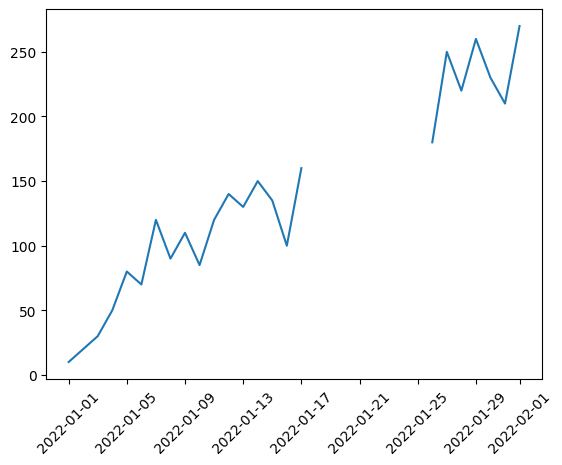

In [12]:
x = sample_df["date"].to_list()
y = sample_df["sales"].to_list()
plt.plot(x, y)
plt.xticks(rotation=45)
plt.show()

In [13]:
def plot_time_series(df: pl.DataFrame, label: str = "", color: str = None) -> None:
    """Plot time series data."""
    x = df["date"].to_list()
    y = df["sales"].to_list()
    plt.plot(x, y, label=label, color=color, alpha=0.5)
    plt.xticks(rotation=45)
    plt.tight_layout()

### Techniques To Fill Missing Values

- Forward Fill
- Backward Fill
- Mean/Median/Mode Imputation
- Interpolation
  - Linear: Connect the dots(i.e. draw a straight line between two known points and fill in the missing values along that line)
  - Nearest: Fill in the missing values with the nearest known value. (similar to forward/backward fill but not exactly the same)
  - Spline: More complex form of interpolation that uses polynomials to fit the data points. It is more flexible than linear interpolation and can capture more complex patterns in the data.
  - Polynomial: Similar to spline but uses a single polynomial to fit the data points. It is less flexible than spline but can still capture some non-linear patterns in the data.

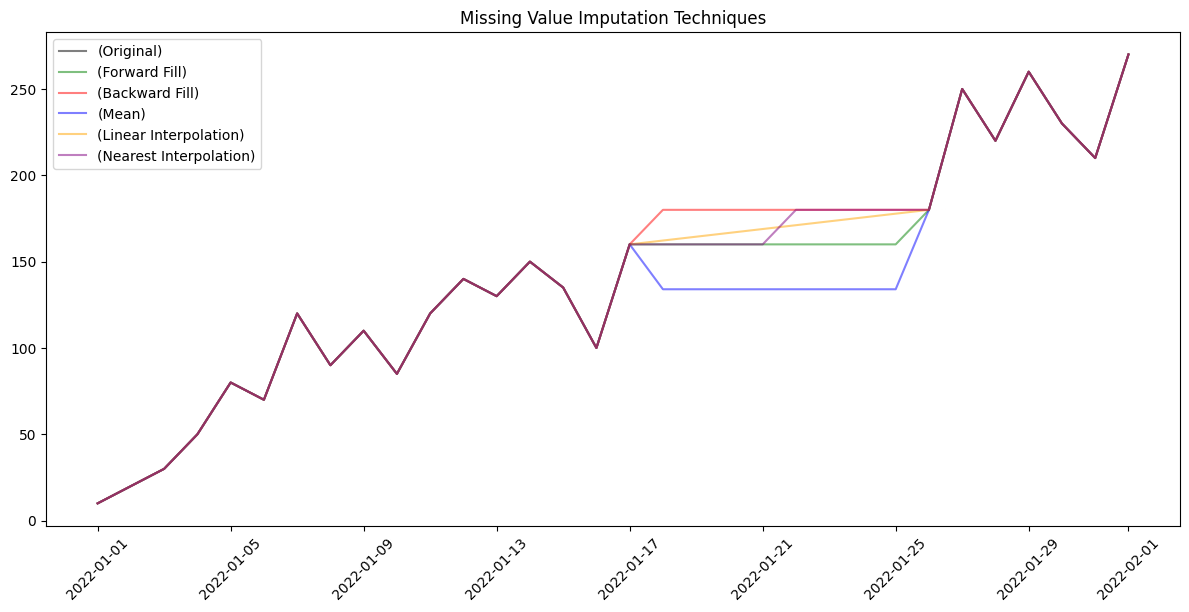

In [ ]:
sample_df_ffill = sample_df.with_columns(pl.col("sales").fill_null(strategy="forward"))
sample_df_bfill = sample_df.with_columns(pl.col("sales").fill_null(strategy="backward"))
sample_df_mean = sample_df.with_columns(pl.col("sales").fill_null(strategy="mean"))
sample_df_linear = sample_df.with_columns(pl.col("sales").interpolate(method="linear"))
sample_df_nearest = sample_df.with_columns(pl.col("sales").interpolate(method="nearest"))


plt.figure(figsize=(12, 6))
plot_time_series(sample_df, label="(Original)", color="black")
plot_time_series(sample_df_ffill, label="(Forward Fill)", color="green")
plot_time_series(sample_df_bfill, label="(Backward Fill)", color="red")
plot_time_series(sample_df_mean, label="(Mean)", color="blue")
plot_time_series(sample_df_linear, label="(Linear Interpolation)", color="orange")
plot_time_series(sample_df_nearest, label="(Nearest Interpolation)", color="purple")
plt.title("Missing Value Imputation Techniques")
plt.legend()
plt.show()

In [15]:
fp: str = "../../../../../Documents/data_dump/time_series_data/london_smart_meters/"
source_data = Path(fp)
block_data_path = source_data / "hhblock_dataset" / "hhblock_dataset"

assert block_data_path.is_dir(), (
    "Please check if the dataset has been downloaded properly. Refer to the Preface of the book or "
    "the Readme in the repo for expected data"
)

In [ ]:
block_1: pl.DataFrame = pl.read_csv(block_data_path / "block_0.csv", try_parse_dates=False)
block_1 = block_1.with_columns(pl.col("day").str.to_datetime(format="%Y-%m-%d"))
display(block_1.head())


block_1_pd = pd.read_csv(block_data_path / "block_0.csv", parse_dates=False)

block_1_pd["day"] = pd.to_datetime(block_1_pd["day"], yearfirst=True)

block_1_pd.head()

LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,hh_8,hh_9,hh_10,hh_11,hh_12,hh_13,hh_14,hh_15,hh_16,hh_17,hh_18,hh_19,hh_20,hh_21,hh_22,hh_23,hh_24,hh_25,hh_26,hh_27,hh_28,hh_29,hh_30,hh_31,hh_32,hh_33,hh_34,hh_35,hh_36,hh_37,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
str,datetime[μs],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""MAC000002""",2012-10-13 00:00:00,0.263,0.269,0.275,0.256,0.211,0.136,0.161,0.119,0.167,0.109,0.168,0.107,0.166,0.117,0.157,0.126,0.146,0.106,0.135,0.191,0.915,0.933,0.122,0.138,0.076,0.133,0.076,0.133,0.085,0.263,0.134,0.235,0.124,0.184,0.23,0.176,0.388,0.26,0.918,0.278,0.267,0.239,0.23,0.233,0.235,0.188,0.259,0.25
"""MAC000002""",2012-10-14 00:00:00,0.262,0.166,0.226,0.088,0.126,0.082,0.123,0.083,0.12,0.079,0.121,0.075,0.124,0.073,0.125,0.07,0.13,0.108,0.196,0.346,0.524,0.076,0.129,0.667,0.23,0.22,0.163,0.091,0.17,0.11,0.11,0.121,0.099,0.157,0.093,0.371,0.386,1.085,1.075,0.956,0.821,0.745,0.712,0.511,0.231,0.21,0.278,0.159
"""MAC000002""",2012-10-15 00:00:00,0.192,0.097,0.141,0.083,0.132,0.07,0.13,0.074,0.124,0.078,0.118,0.082,0.112,0.087,0.106,0.14,0.12,1.075,0.146,0.123,0.082,0.127,0.077,0.551,0.149,0.129,0.075,0.13,0.075,0.129,0.075,0.128,0.166,0.194,0.695,0.26,0.227,0.255,1.164,0.249,0.225,0.258,0.26,0.334,0.299,0.236,0.241,0.237
"""MAC000002""",2012-10-16 00:00:00,0.237,0.237,0.193,0.118,0.098,0.107,0.094,0.109,0.091,0.105,0.091,0.104,0.092,0.103,0.093,0.101,0.144,0.1,0.408,0.102,0.1,0.116,0.354,0.146,0.19,0.991,0.31,0.121,0.113,0.094,0.119,0.087,0.13,0.238,0.204,0.284,0.447,0.266,0.966,0.172,0.192,0.228,0.203,0.211,0.188,0.213,0.157,0.202
"""MAC000002""",2012-10-17 00:00:00,0.157,0.211,0.155,0.169,0.101,0.117,0.084,0.118,0.08,0.119,0.075,0.123,0.071,0.126,0.067,0.124,0.118,0.132,0.358,0.628,0.784,0.681,0.749,0.593,0.502,0.115,0.113,0.092,0.124,0.084,0.125,0.078,0.136,0.227,0.207,0.141,0.258,0.217,0.223,0.075,0.23,0.208,0.265,0.377,0.327,0.277,0.288,0.256


,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,hh_8,hh_9,hh_10,hh_11,hh_12,hh_13,hh_14,hh_15,hh_16,hh_17,hh_18,hh_19,hh_20,hh_21,hh_22,hh_23,hh_24,hh_25,hh_26,hh_27,hh_28,hh_29,hh_30,hh_31,hh_32,hh_33,hh_34,hh_35,hh_36,hh_37,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
0,MAC000002,2012-10-13,0.263,0.269,0.275,0.256,0.211,0.136,0.161,0.119,0.167,0.109,0.168,0.107,0.166,0.117,0.157,0.126,0.146,0.106,0.135,0.191,0.915,0.933,0.122,0.138,0.076,0.133,0.076,0.133,0.085,0.263,0.134,0.235,0.124,0.184,0.230,0.176,0.388,0.260,0.918,0.278,0.267,0.239,0.230,0.233,0.235,0.188,0.259,0.250
1,MAC000002,2012-10-14,0.262,0.166,0.226,0.088,0.126,0.082,0.123,0.083,0.120,0.079,0.121,0.075,0.124,0.073,0.125,0.070,0.130,0.108,0.196,0.346,0.524,0.076,0.129,0.667,0.230,0.220,0.163,0.091,0.170,0.110,0.110,0.121,0.099,0.157,0.093,0.371,0.386,1.085,1.075,0.956,0.821,0.745,0.712,0.511,0.231,0.210,0.278,0.159
2,MAC000002,2012-10-15,0.192,0.097,0.141,0.083,0.132,0.070,0.130,0.074,0.124,0.078,0.118,0.082,0.112,0.087,0.106,0.140,0.120,1.075,0.146,0.123,0.082,0.127,0.077,0.551,0.149,0.129,0.075,0.130,0.075,0.129,0.075,0.128,0.166,0.194,0.695,0.260,0.227,0.255,1.164,0.249,0.225,0.258,0.260,0.334,0.299,0.236,0.241,0.237
3,MAC000002,2012-10-16,0.237,0.237,0.193,0.118,0.098,0.107,0.094,0.109,0.091,0.105,0.091,0.104,0.092,0.103,0.093,0.101,0.144,0.100,0.408,0.102,0.100,0.116,0.354,0.146,0.190,0.991,0.310,0.121,0.113,0.094,0.119,0.087,0.130,0.238,0.204,0.284,0.447,0.266,0.966,0.172,0.192,0.228,0.203,0.211,0.188,0.213,0.157,0.202
4,MAC000002,2012-10-17,0.157,0.211,0.155,0.169,0.101,0.117,0.084,0.118,0.080,0.119,0.075,0.123,0.071,0.126,0.067,0.124,0.118,0.132,0.358,0.628,0.784,0.681,0.749,0.593,0.502,0.115,0.113,0.092,0.124,0.084,0.125,0.078,0.136,0.227,0.207,0.141,0.258,0.217,0.223,0.075,0.230,0.208,0.265,0.377,0.327,0.277,0.288,0.256


### Compact Format

- This occurs when any particular time series occupies only a single row in the DataFrame. i.e. the time dimension is managed as an array within a DataFrame row.


In [17]:
import polars.selectors as cs
from tqdm import tqdm

In [18]:
block_1.head()

LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,hh_8,hh_9,hh_10,hh_11,hh_12,hh_13,hh_14,hh_15,hh_16,hh_17,hh_18,hh_19,hh_20,hh_21,hh_22,hh_23,hh_24,hh_25,hh_26,hh_27,hh_28,hh_29,hh_30,hh_31,hh_32,hh_33,hh_34,hh_35,hh_36,hh_37,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
str,datetime[μs],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""MAC000002""",2012-10-13 00:00:00,0.263,0.269,0.275,0.256,0.211,0.136,0.161,0.119,0.167,0.109,0.168,0.107,0.166,0.117,0.157,0.126,0.146,0.106,0.135,0.191,0.915,0.933,0.122,0.138,0.076,0.133,0.076,0.133,0.085,0.263,0.134,0.235,0.124,0.184,0.23,0.176,0.388,0.26,0.918,0.278,0.267,0.239,0.23,0.233,0.235,0.188,0.259,0.25
"""MAC000002""",2012-10-14 00:00:00,0.262,0.166,0.226,0.088,0.126,0.082,0.123,0.083,0.12,0.079,0.121,0.075,0.124,0.073,0.125,0.07,0.13,0.108,0.196,0.346,0.524,0.076,0.129,0.667,0.23,0.22,0.163,0.091,0.17,0.11,0.11,0.121,0.099,0.157,0.093,0.371,0.386,1.085,1.075,0.956,0.821,0.745,0.712,0.511,0.231,0.21,0.278,0.159
"""MAC000002""",2012-10-15 00:00:00,0.192,0.097,0.141,0.083,0.132,0.07,0.13,0.074,0.124,0.078,0.118,0.082,0.112,0.087,0.106,0.14,0.12,1.075,0.146,0.123,0.082,0.127,0.077,0.551,0.149,0.129,0.075,0.13,0.075,0.129,0.075,0.128,0.166,0.194,0.695,0.26,0.227,0.255,1.164,0.249,0.225,0.258,0.26,0.334,0.299,0.236,0.241,0.237
"""MAC000002""",2012-10-16 00:00:00,0.237,0.237,0.193,0.118,0.098,0.107,0.094,0.109,0.091,0.105,0.091,0.104,0.092,0.103,0.093,0.101,0.144,0.1,0.408,0.102,0.1,0.116,0.354,0.146,0.19,0.991,0.31,0.121,0.113,0.094,0.119,0.087,0.13,0.238,0.204,0.284,0.447,0.266,0.966,0.172,0.192,0.228,0.203,0.211,0.188,0.213,0.157,0.202
"""MAC000002""",2012-10-17 00:00:00,0.157,0.211,0.155,0.169,0.101,0.117,0.084,0.118,0.08,0.119,0.075,0.123,0.071,0.126,0.067,0.124,0.118,0.132,0.358,0.628,0.784,0.681,0.749,0.593,0.502,0.115,0.113,0.092,0.124,0.084,0.125,0.078,0.136,0.227,0.207,0.141,0.258,0.217,0.223,0.075,0.23,0.208,0.265,0.377,0.327,0.277,0.288,0.256


In [ ]:
def preprocess_compact(
    df: pl.DataFrame,
) -> tuple[Any, Any, np.ndarray[Any, Any], int]:
    """Preprocess compact dataset."""
    # Extract metadata
    start_date: datetime = df.select(pl.col("day").min()).item()
    name: str = df.select(pl.col("LCLid").first()).item()  # Assumes single LCLid per group

    # Define date range
    end_date: datetime = datetime(2014, 2, 27)
    date_range = pl.datetime_range(start_date, end_date, interval="1d", eager=True)

    # Create full grid: every date × every hh_0 to hh_47 (half-hourly data)
    hh_blocks: list[str] = [f"hh_{i}" for i in range(48)]
    grid: pl.DataFrame = pl.DataFrame({"day": date_range}).join(pl.DataFrame({"hour_block": hh_blocks}), how="cross")

    # Left join to introduce NaNs for missing timestamps
    merged: pl.DataFrame = grid.join(df, on=["day", "hour_block"], how="left")

    # Sort by day and offset
    merged = merged.sort(["day", "offset"])

    # Extract time series as numpy array
    ts = merged["energy_consumption"].to_numpy()
    len_ts = len(ts)

    return start_date, name, ts, len_ts


def load_process_block_compact(
    df: pl.DataFrame,
    freq: str = "30m",
    ts_identifier: str = "series_name",
    value_name: str = "series_value",
) -> pl.DataFrame:
    """Load and process compact dataset."""
    grps: pl.DataFrame = df.group_by("LCLid")
    all_series: list[Any] = []
    all_start_dates: list[datetime] = []
    all_names: list[str] = []
    all_data: dict = {}
    all_lengths: list[int] = []

    for _, df_grp in tqdm(grps):
        start_date, name, ts, len_ts = preprocess_compact(df_grp)
        all_series.append(ts)
        all_start_dates.append(start_date)
        all_names.append(name)
        all_lengths.append(len_ts)

    all_data[ts_identifier] = all_names
    all_data["start_date"] = all_start_dates
    all_data["frequency"] = freq
    all_data[value_name] = all_series
    all_data["series_length"] = all_lengths

    return pl.DataFrame(all_data)

In [ ]:
block_1_long: pl.DataFrame = (
    block_1.unpivot(
        index=["LCLid", "day"],
        on=cs.starts_with("hh_"),
        variable_name="hour_block",
        value_name="energy_consumption",
    )
    .with_columns(pl.col("hour_block").str.replace("hh_", "").cast(pl.Int8).alias("offset"))
    .sort(["LCLid", "day", "offset"])
)
display(block_1_long.head())

LCLid,day,hour_block,energy_consumption,offset
str,datetime[μs],str,f64,i8
"""MAC000002""",2012-10-13 00:00:00,"""hh_0""",0.263,0
"""MAC000002""",2012-10-13 00:00:00,"""hh_1""",0.269,1
"""MAC000002""",2012-10-13 00:00:00,"""hh_2""",0.275,2
"""MAC000002""",2012-10-13 00:00:00,"""hh_3""",0.256,3
"""MAC000002""",2012-10-13 00:00:00,"""hh_4""",0.211,4


In [21]:
preprocess_compact(block_1_long)

(datetime.datetime(2011, 12, 4, 0, 0),
 'MAC000002',
 array([0.175, 0.098, 0.144, ..., 0.073, 0.258, 0.192], shape=(1213728,)),
 1213728)

In [22]:
block1_compact: pl.DataFrame = load_process_block_compact(
    df=block_1_long,
    freq="30m",
    ts_identifier="series_name",
    value_name="series_value",
)


block1_compact.head()

50it [00:00, 412.78it/s]


series_name,start_date,frequency,series_value,series_length
str,datetime[μs],str,list[f64],i64
"""MAC000002""",2012-10-13 00:00:00,"""30m""","[0.263, 0.269, … 1.2180001]",24144
"""MAC000246""",2011-12-04 00:00:00,"""30m""","[0.175, 0.098, … 0.223]",39216
"""MAC000450""",2012-03-23 00:00:00,"""30m""","[1.337, 1.426, … NaN]",33936
"""MAC001074""",2012-05-09 00:00:00,"""30m""","[0.18, 0.086, … NaN]",31680
"""MAC003223""",2012-09-18 00:00:00,"""30m""","[0.076, 0.079, … 0.38]",25344


In [ ]:
def preprocess_expanded(df: pl.DataFrame) -> pl.DataFrame:
    """Preprocess expanded dataset."""
    start_date = df["day"].min()
    end_date = df["day"].max()
    id: str = df.select(pl.col("LCLid").first()).item()

    # Fill missing dates with NaNs
    dr = pl.datetime_range(start_date, end_date, interval="1d", eager=True)
    # Create full grid: every date × every hh_0 to hh_47 (half-hourly data)
    hh_blocks: list[str] = [f"hh_{i}" for i in range(48)]
    grid: pl.DataFrame = (
        pl.DataFrame({"day": dr})
        .join(pl.DataFrame({"hour_block": hh_blocks}), how="cross")
        .with_columns(pl.lit(id).alias("LCLid"))
    )
    merged: pl.DataFrame = grid.join(
        df,
        on=["day", "hour_block", "LCLid"],
        how="left",
    )
    merged = merged.sort(["day", "offset"])
    return merged.with_columns(pl.lit(len(merged)).alias("series_length"))


def load_process_block_expanded(df: pl.DataFrame, freq: str = "30m") -> pl.DataFrame:
    """Load and process expanded dataset."""
    grps: pl.DataFrame = df.group_by("LCLid")
    all_series: list[Any] = []

    for _, df_grp in tqdm(grps):
        ts: pl.DataFrame = preprocess_expanded(df_grp)
        all_series.append(ts)

    all_df: pl.DataFrame = pl.concat(all_series)
    # Recreate offset because there'd be naNs in between
    all_df = all_df.with_columns(pl.col("hour_block").str.replace("hh_", "").cast(pl.Int8).alias("offset"))
    # Create a datetime column
    return (
        all_df.with_columns(
            (pl.col("day") + pl.duration(minutes=pl.col("offset") * 30)).alias("timestamp"),
            pl.lit(freq).alias("frequency"),
        )
        .sort(["LCLid", "timestamp"])
        .drop(["hour_block", "offset", "day"])
    )

In [24]:
block_1_long.head()

LCLid,day,hour_block,energy_consumption,offset
str,datetime[μs],str,f64,i8
"""MAC000002""",2012-10-13 00:00:00,"""hh_0""",0.263,0
"""MAC000002""",2012-10-13 00:00:00,"""hh_1""",0.269,1
"""MAC000002""",2012-10-13 00:00:00,"""hh_2""",0.275,2
"""MAC000002""",2012-10-13 00:00:00,"""hh_3""",0.256,3
"""MAC000002""",2012-10-13 00:00:00,"""hh_4""",0.211,4


In [25]:
block1_expanded: pl.DataFrame = load_process_block_expanded(block_1_long, freq="30min")

block1_expanded.head()

50it [00:00, 387.66it/s]


LCLid,energy_consumption,series_length,timestamp,frequency
str,f64,i32,datetime[μs],str
"""MAC000002""",0.25,24144,2012-10-12 21:54:00,"""30min"""
"""MAC000002""",0.134,24144,2012-10-12 21:56:00,"""30min"""
"""MAC000002""",0.117,24144,2012-10-12 21:58:00,"""30min"""
"""MAC000002""",0.278,24144,2012-10-12 22:10:00,"""30min"""
"""MAC000002""",0.122,24144,2012-10-12 22:12:00,"""30min"""


In [26]:
del block_1, block_1_long, block1_compact, block1_expanded

In [ ]:
block_df_l: list[pl.DataFrame] = []

for file in tqdm(sorted(block_data_path.glob("block_*.csv")), desc="Processing blocks..."):
    block_df: pl.DataFrame = pl.read_csv(file, try_parse_dates=False)
    try:
        block_df = block_df.with_columns(pl.col("day").str.to_datetime(format="%Y-%m-%d"))
    except Exception:
        console.print(f"[warning]⚠️  Could not parse dates in {file.name}[/warning]. Trying with time...")
        block_df = block_df.with_columns(pl.col("day").str.to_datetime(format="%Y-%m-%d %H:%M:%S"))
    # Select only from 2012-01-01
    date_: datetime = datetime(2012, 1, 1)
    block_df = block_df.filter(pl.col("day").ge(date_))
    # Create long format
    block_df = (
        block_df.unpivot(
            index=["LCLid", "day"],
            on=cs.starts_with("hh_"),
            variable_name="hour_block",
            value_name="energy_consumption",
        )
        .with_columns(pl.col("hour_block").str.replace("hh_", "").cast(pl.Int8).alias("offset"))
        .sort(["LCLid", "day", "offset"])
    )
    block_df_l.append(
        load_process_block_compact(
            block_df,
            freq="30m",
            ts_identifier="LCLid",
            value_name="energy_consumption",
        )
    )

Processing blocks...: 100%|██████████| 112/112 [00:34<00:00,  3.21it/s]


In [28]:
hhblock_df: pl.DataFrame = pl.concat(block_df_l)
del block_df_l

display(hhblock_df.head())
print(f"Shape: {hhblock_df.shape}")

LCLid,start_date,frequency,energy_consumption,series_length
str,datetime[μs],str,list[f64],i64
"""MAC000002""",2012-10-13 00:00:00,"""30m""","[0.263, 0.269, … 1.2180001]",24144
"""MAC000246""",2012-01-01 00:00:00,"""30m""","[0.509, 0.317, … 0.223]",37872
"""MAC000450""",2012-03-23 00:00:00,"""30m""","[1.337, 1.426, … NaN]",33936
"""MAC001074""",2012-05-09 00:00:00,"""30m""","[0.18, 0.086, … NaN]",31680
"""MAC003223""",2012-09-18 00:00:00,"""30m""","[0.076, 0.079, … 0.38]",25344


Shape: (5560, 5)


### Add Additional Data

In [29]:
households_info_fp: str = "informations_households.csv"
household_info = pl.read_csv(source_data / households_info_fp)
household_info.head()

LCLid,stdorToU,Acorn,Acorn_grouped,file
str,str,str,str,str
"""MAC005492""","""ToU""","""ACORN-""","""ACORN-""","""block_0"""
"""MAC001074""","""ToU""","""ACORN-""","""ACORN-""","""block_0"""
"""MAC000002""","""Std""","""ACORN-A""","""Affluent""","""block_0"""
"""MAC003613""","""Std""","""ACORN-A""","""Affluent""","""block_0"""
"""MAC003597""","""Std""","""ACORN-A""","""Affluent""","""block_0"""


In [30]:
hhblock_df = hhblock_df.join(household_info, on="LCLid", how="left")

hhblock_df.head()

LCLid,start_date,frequency,energy_consumption,series_length,stdorToU,Acorn,Acorn_grouped,file
str,datetime[μs],str,list[f64],i64,str,str,str,str
"""MAC000002""",2012-10-13 00:00:00,"""30m""","[0.263, 0.269, … 1.2180001]",24144,"""Std""","""ACORN-A""","""Affluent""","""block_0"""
"""MAC000246""",2012-01-01 00:00:00,"""30m""","[0.509, 0.317, … 0.223]",37872,"""Std""","""ACORN-A""","""Affluent""","""block_0"""
"""MAC000450""",2012-03-23 00:00:00,"""30m""","[1.337, 1.426, … NaN]",33936,"""Std""","""ACORN-A""","""Affluent""","""block_0"""
"""MAC001074""",2012-05-09 00:00:00,"""30m""","[0.18, 0.086, … NaN]",31680,"""ToU""","""ACORN-""","""ACORN-""","""block_0"""
"""MAC003223""",2012-09-18 00:00:00,"""30m""","[0.076, 0.079, … 0.38]",25344,"""Std""","""ACORN-A""","""Affluent""","""block_0"""


In [ ]:
original_bank_holidays = pl.read_csv(source_data / "uk_bank_holidays.csv", try_parse_dates=True)
try:
    bank_holidays = original_bank_holidays.with_columns(
        pl.col("Bank holidays").cast(pl.Utf8).str.to_datetime(format="%Y-%m-%d")
    )
except Exception:
    print("Bank holidays are already in datetime format")
    bank_holidays = original_bank_holidays.with_columns(
        pl.col("Bank holidays").cast(pl.Utf8).str.to_datetime(format="%Y-%m-%d %H:%M:%S")
    )

bank_holidays = bank_holidays.sort("Bank holidays")
bank_holidays.head()

Bank holidays,Type
datetime[μs],str
2012-02-01 00:00:00,"""New Year?s Day (substitute day)"""
2012-04-06 00:00:00,"""Spring bank holiday (substitute day)"""
2012-05-06 00:00:00,"""Queen?s Diamond Jubilee (extra bank holiday)"""
2012-06-04 00:00:00,"""Good Friday"""
2012-07-05 00:00:00,"""Early May bank holiday"""


### Resample

- Use `upsample`
- Or manually create a new DataFrame with the desired frequency and then join/merge it with the original DataFrame.

In [32]:
# Upsample bank holidays
bank_holidays = (
    bank_holidays.upsample("Bank holidays", every="30m")
    .with_columns(pl.col("Type").fill_null(strategy="forward"))
    .sort("Bank holidays")
)

bank_holidays.head(5)

Bank holidays,Type
datetime[μs],str
2012-02-01 00:00:00,"""New Year?s Day (substitute day)"""
2012-02-01 00:30:00,"""New Year?s Day (substitute day)"""
2012-02-01 01:00:00,"""New Year?s Day (substitute day)"""
2012-02-01 01:30:00,"""New Year?s Day (substitute day)"""
2012-02-01 02:00:00,"""New Year?s Day (substitute day)"""


In [33]:
# # OR
# # Create 30-minute intervals by resampling and interpolating the hourly weather data
# min_time = bank_holidays["Bank holidays"].min()
# max_time = bank_holidays["Bank holidays"].max()

# # Create 30-minute time range using datetime_range
# time_range = pl.datetime_range(start=min_time, end=max_time, interval="30m", eager=True)

# # Create a complete DataFrame with all 30-minute timestamps
# weather_grid = pl.DataFrame({"Bank holidays": time_range})

# # Join with the original data and interpolate missing values
# bank_holidays_resampled = (
#     weather_grid.join(bank_holidays, on="Bank holidays", how="left")
#     .fill_null(strategy="forward")
#     .with_columns(
#         pl.col("Bank holidays").cast(pl.Datetime("us")).alias("Bank holidays")
#     )
# )

# bank_holidays_resampled.head()

In [ ]:
weather_hourly = pl.read_csv(source_data / "weather_hourly_darksky.csv", try_parse_dates=False)
weather_hourly = weather_hourly.with_columns(pl.col("time").str.to_datetime("%Y-%m-%d %H:%M:%S"))
weather_hourly = weather_hourly.sort("time")
weather_hourly.head()

visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
f64,i64,f64,datetime[μs],f64,f64,f64,f64,str,str,f64,str
13.63,160,13.49,2011-11-01 00:00:00,11.48,1008.14,13.49,3.11,"""rain""","""clear-night""",0.88,"""Clear"""
13.26,154,12.73,2011-11-01 01:00:00,11.58,1007.88,12.73,3.08,"""rain""","""partly-cloudy-night""",0.93,"""Partly Cloudy"""
12.94,161,13.65,2011-11-01 02:00:00,12.14,1007.09,13.65,3.71,"""rain""","""clear-night""",0.91,"""Clear"""
12.99,170,14.13,2011-11-01 03:00:00,12.24,1006.5,14.13,3.95,"""rain""","""partly-cloudy-night""",0.88,"""Partly Cloudy"""
12.92,180,14.17,2011-11-01 04:00:00,12.59,1006.14,14.17,3.97,"""rain""","""partly-cloudy-night""",0.9,"""Partly Cloudy"""


In [ ]:
# Upsample weather data
weather_hourly = weather_hourly.upsample("time", every="30m").fill_null(strategy="forward")
weather_hourly.head()

time,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
datetime[μs],f64,i64,f64,f64,f64,f64,f64,str,str,f64,str
2011-11-01 00:00:00,13.63,160,13.49,11.48,1008.14,13.49,3.11,"""rain""","""clear-night""",0.88,"""Clear"""
2011-11-01 00:30:00,13.63,160,13.49,11.48,1008.14,13.49,3.11,"""rain""","""clear-night""",0.88,"""Clear"""
2011-11-01 01:00:00,13.26,154,12.73,11.58,1007.88,12.73,3.08,"""rain""","""partly-cloudy-night""",0.93,"""Partly Cloudy"""
2011-11-01 01:30:00,13.26,154,12.73,11.58,1007.88,12.73,3.08,"""rain""","""partly-cloudy-night""",0.93,"""Partly Cloudy"""
2011-11-01 02:00:00,12.94,161,13.65,12.14,1007.09,13.65,3.71,"""rain""","""clear-night""",0.91,"""Clear"""


In [ ]:
def map_weather_holidays_polars(
    hhblock_df: pl.DataFrame,
    bank_holidays: pl.DataFrame,
    weather_hourly: pl.DataFrame,
    *,
    start_col: str = "start_date",
    series_len_col: str = "series_length",
    step_minutes: int = 30,
    bh_time_col: str = "Bank holidays",
    wh_time_col: str = "time",
    weather_cols: list[str] | None = None,
    batch_rows: int | None = None,
) -> pl.DataFrame:
    """
    Map bank holidays and weather features onto each time series row (as list columns)
    using a memory-safe, vectorized Polars pipeline.

    Params:
    - hhblock_df: Compact per-series frame. Must contain start_col (Datetime) and series_len_col (Int).
    - bank_holidays: Must contain a datetime column (bh_time_col) and a "Type" column.
    - weather_hourly: Must contain a datetime column (wh_time_col) and feature columns.
    - start_col: Name of start timestamp column in hhblock_df (default: "start_date").
    - series_len_col: Name of series length column (default: "series_length").
    - step_minutes: Interval step in minutes (default: 30).
    - bh_time_col: Datetime column in bank_holidays (default: "Bank holidays").
    - wh_time_col: Datetime column in weather_hourly (default: "time").
    - weather_cols: Optional subset of weather feature columns to keep (reduces memory).
    - batch_rows: If set, processes the input in row-sized batches to limit peak memory.

    Returns:
    - hhblock_df with additional list columns: "holidays" and one list per selected weather feature.
    """
    # Normalize join keys
    bh = bank_holidays.rename({bh_time_col: "timestamp"})
    wh = weather_hourly.rename({wh_time_col: "timestamp"})

    # Reduce weather columns if requested
    if weather_cols is not None:
        keep = ["timestamp"] + [c for c in weather_cols if c in wh.columns]
        wh = wh.select(keep)

    def process_chunk(df_chunk: pl.DataFrame) -> pl.DataFrame:
        # Create per-row offsets and compute timestamps without using datetime_range
        base = (
            df_chunk.with_row_index("row_id")
            .with_columns(pl.int_ranges(0, pl.col(series_len_col)).alias("offset_idx"))
            .explode("offset_idx")
            .with_columns((pl.col(start_col) + pl.duration(minutes=pl.col("offset_idx") * step_minutes)).alias("timestamp"))
            .select("row_id", "timestamp")
        )

        # Streaming lazy joins to keep memory in check
        long_enriched = (
            base.lazy()
            .join(bh.lazy(), on="timestamp", how="left")
            .with_columns(pl.col("Type").fill_null("NO_HOLIDAY"))
            .join(wh.lazy(), on="timestamp", how="left")
        )

        # Aggregate back to list columns per series row using implode()
        effective_weather_cols = [c for c in wh.columns if c != "timestamp"]
        aggs = [pl.col("Type").implode().alias("holidays")] + [pl.col(c).implode().alias(c) for c in effective_weather_cols]
        lists_per_row = long_enriched.group_by("row_id").agg(aggs).collect(streaming=True)

        # Attach aggregated lists back to the original chunk
        return df_chunk.with_row_index("row_id").join(lists_per_row, on="row_id", how="left").drop("row_id")

    if batch_rows and batch_rows > 0:
        out_parts: list[pl.DataFrame] = []
        n = hhblock_df.height
        for start in range(0, n, batch_rows):
            size = min(batch_rows, n - start)
            part = hhblock_df.slice(start, size)
            out_parts.append(process_chunk(part))
        return pl.concat(out_parts, how="vertical_relaxed")

    # Single-shot processing
    return process_chunk(hhblock_df)

In [ ]:
# Apply the Polars-native mapping to hhblock_df
# Process in batches to reduce peak memory usage and avoid kernel crashes.
# You can tune batch_rows depending on your machine (e.g., 10, 25, 50, 100).

# Keep only a small subset of weather features to limit memory use
_candidate_weather_cols = [
    "temperature",
    "apparentTemperature",
    "humidity",
    "windSpeed",
    "precipIntensity",
    "cloudCover",
    "pressure",
]
_selected_weather_cols = [c for c in _candidate_weather_cols if c in weather_hourly.columns]

hhblock_df = map_weather_holidays_polars(
    hhblock_df=hhblock_df,
    bank_holidays=bank_holidays,
    weather_hourly=weather_hourly,
    weather_cols=_selected_weather_cols,
    batch_rows=2,  # start small on 16GB; increase if it runs comfortably
)

hhblock_df.head()

: 

### Scale-safe mapping: write chunked results to Parquet

When the full dataset exceeds memory even with small batches, write each batch to Parquet instead of concatenating in memory, then scan the output lazily for downstream use. This keeps peak memory low on machines with limited RAM.

In [40]:
hhblock_df.shape

(10, 15)

In [ ]:
from pathlib import Path


def map_weather_holidays_polars_to_parquet(
    hhblock_df: pl.DataFrame,
    bank_holidays: pl.DataFrame,
    weather_hourly: pl.DataFrame,
    *,
    out_dir: str | Path,
    start_col: str = "start_date",
    series_len_col: str = "series_length",
    step_minutes: int = 30,
    bh_time_col: str = "Bank holidays",
    wh_time_col: str = "time",
    weather_cols: list[str] | None = None,
    batch_rows: int = 100,
    file_prefix: str = "mapped",
) -> list[Path]:
    """
    Disk-backed variant: processes hhblock_df in small batches and writes each result to Parquet.
    Returns list of written file paths. Use pl.scan_parquet on the folder to read lazily.
    """
    out_dir = Path(out_dir)
    out_dir.mkdir(parents=True, exist_ok=True)

    # Reuse in-memory batch processor on slices
    written: list[Path] = []

    n = hhblock_df.height
    file_idx = 0
    for start in range(0, n, batch_rows):
        size = min(batch_rows, n - start)
        part = hhblock_df.slice(start, size)
        part_out = map_weather_holidays_polars(
            hhblock_df=part,
            bank_holidays=bank_holidays,
            weather_hourly=weather_hourly,
            start_col=start_col,
            series_len_col=series_len_col,
            step_minutes=step_minutes,
            bh_time_col=bh_time_col,
            wh_time_col=wh_time_col,
            weather_cols=weather_cols,
            batch_rows=2,  # inner micro-batching for safety
        )
        fp = out_dir / f"{file_prefix}_{file_idx:05d}.parquet"
        part_out.write_parquet(fp)
        written.append(fp)
        file_idx += 1
    return written

In [ ]:
# Driver: write chunked mapped results to disk and then scan lazily
out_dir = Path("../../data/hhblock_mapped")

written_files = map_weather_holidays_polars_to_parquet(
    hhblock_df=hhblock_df,
    bank_holidays=bank_holidays,
    weather_hourly=weather_hourly,
    out_dir=out_dir,
    weather_cols=_selected_weather_cols,
    batch_rows=100,  # outer chunking; tune for RAM and disk speed
)

# Lazily scan the folder without loading everything into memory
mapped_lazy = pl.scan_parquet(str(out_dir / "*.parquet"))

# Sample a few rows to verify
mapped_lazy.head(5).collect()